<a href="https://colab.research.google.com/github/hamzajb95/CE888/blob/main/Lab7/Exercise2_DogvsCat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - Increased the accuracy to 77.0 by changing the dense layer to two dense layers of 128 and 64.


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "hamzajb" # username from the json file
os.environ['KAGGLE_KEY'] = "3baf3d140663334d1c7baab54e5cf6c4" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

100% 271M/271M [00:03<00:00, 97.2MB/s]
100% 271M/271M [00:03<00:00, 78.8MB/s]
 97% 526M/543M [00:04<00:00, 142MB/s]
100% 543M/543M [00:04<00:00, 122MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 95.3MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
# Make new base directory
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 15, 15, 128)     

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = 'model.hdf5'
callbacks_list = [
    EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True), 
    ModelCheckpoint(filepath, monitor ="val_loss", save_best_only=True)]

In [ ]:
history = model.fit_generator(train_generator,
                              #steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10,
                              callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 18s 171ms/step - loss: 0.6951 - acc: 0.4729 - val_loss: 0.6904 - val_acc: 0.4800
Epoch 2/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6900 - acc: 0.5201 - val_loss: 0.6800 - val_acc: 0.5450
Epoch 3/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6817 - acc: 0.5643 - val_loss: 0.6534 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6707 - acc: 0.5847 - val_loss: 0.6332 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6600 - acc: 0.5934 - val_loss: 0.6477 - val_acc: 0.6150
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.6549 - acc: 0.6098 - val_loss: 0.6158 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6422 - acc: 0.6284 - val_loss: 0.6936 - val_acc: 0.6000
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 3s 65ms/step - loss: 0.4777 - acc: 0.7700


[0.4777223765850067, 0.7699999809265137]

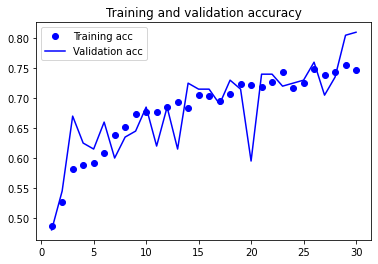

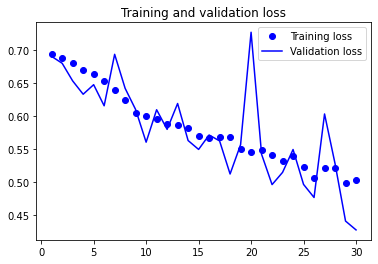

In [ ]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Convolutional Networks with Dropout

![alt text](https://camo.githubusercontent.com/ee6fa1073247cd2c3d241300caf110d7a7541bc5/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a4972644a355067684439596f4f7956415137334d4a772e676966)

Ref: https://github.com/mneha4/Training-Neural-Nets---Guidelines

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 28s 283ms/step - loss: 0.6914 - acc: 0.5253 - val_loss: 0.6761 - val_acc: 0.5863
Epoch 2/20
100/100 [==============================] - 26s 255ms/step - loss: 0.6768 - acc: 0.5747 - val_loss: 0.6847 - val_acc: 0.5329
Epoch 3/20
100/100 [==============================] - 25s 255ms/step - loss: 0.6584 - acc: 0.5994 - val_loss: 0.6360 - val_acc: 0.6218
Epoch 4/20
100/100 [==============================] - 26s 257ms/step - loss: 0.6418 - acc: 0.6203 - val_loss: 0.6241 - val_acc: 0.6360
Epoch 5/20
100/100 [==============================] - 24s 244ms/step - loss: 0.6258 - acc: 0.6591 - val_loss: 0.6043 - val_acc: 0.6574
Epoch 6/20
100/100 [==============================] - 27s 273ms/step - loss: 0.6127 - acc: 0.6716 - val_loss: 0.6135 - val_acc: 0.6347
Epoch 7/20
100/100 [==============================] - 25s 254ms/step - loss: 0.5978 - acc: 0.6697 - val_lo

# Task 2:

We have used Dropout to enhance the performance of the CNN model. Can you please use whatever you like to further enhance the performance from `val_acc: 0.7506`? 